In [1]:
#Imports for model.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
dataset = pd.read_csv('breast_cancer.csv')

In [3]:
X = dataset.drop(columns=['id', 'diagnosis', 'diagnosis_Num', 'texture_mean', 'smoothness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'])
Y = dataset.iloc[ : ,2]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=9) #0.25 test_size default

In [72]:
#Building RF Model
classifier = RandomForestClassifier(max_depth=15) #max_depth argument, look into this for improvements.
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred))
print("Classification Matrix: ")
print(confusion_matrix(y_test, pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Classification Matrix: 
[[89  1]
 [ 4 49]]


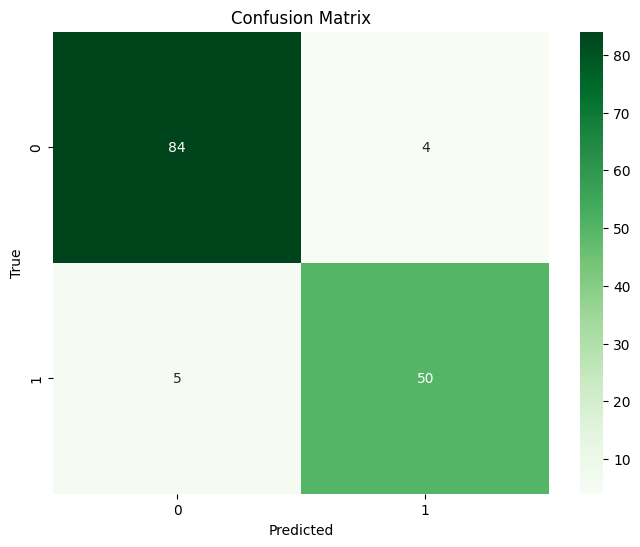

In [6]:
# Building confusion matrix plot
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d", 
            xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()